In [5]:
run all_utils.ipynb

In [6]:
## test on root -> 2 citations - > 4 citations (7 papers)
## this will be a dummy code 
## code block needed 
from networkx.readwrite import json_graph
import json
import networkx as nx
from matplotlib import pylab as pl
from itertools import combinations 
def get_data(paper_where):
        
    base_url = 'https://www.semanticscholar.org'
    filter_ = '?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations'
    print(base_url+paper_where+filter_)
    soup = get_shemantic_paper_html(paper_where)
    data = extract_data(soup)
    #print(data)
    corpus_id = ''.join(data['corpus_id'].split(' '))
    data_api = get_semantic_scholar_paper_by_api(corpus_id)
    
    abstract = data_api['abstract']
    topics = data['topics']
    title = data['title']
    citations =  [cit['link'] for cit in data['citations'][:2]] ## get 2 citation per paper
    #print(topics)
    return topics,title , abstract ,citations
    
    ## get data 
    
    #return  topics
def make_graph_from_abstarct(abstract):
    '''
    generate graph with weights and betweenss from abstarct text 
    args : abstract string 
    return : nx graph 
    '''
    text_network = create_graph(abstract)
    text_network = calculate_central_nodes(text_network,max_nodes = -1)
    return text_network

def procees_topics(topics_raw):
    '''
    procees topics stings to have same format as full graph nodes
    
    args : raw  topic list from api 
    return : cleaned list of topics 
    '''
    topics_words = ((' '.join(topics_raw)).translate(str.maketrans('', '', string.punctuation))).split(' ')
    top = preprocess(topics_words)
    return top
    
def filter_graph(full_graph,topics):
    '''
    process topics list then filter full graph giben topics nodes and merging edges 
    '''
    graph = nx.Graph()
    return filtred_graph




def get_topic_nodes_in_full_g(topics,graph):
    topics_f = procees_topics(topics)
    return list(set(topics_f).intersection(set(list(graph.nodes))))


def all_pairs_From(list_):
    return list(combinations(list_ , 2)) 
def get_Sp(pair,graph ,topics_f):
    is_edgeable = False
    ## get s path
    path = nx.shortest_path(graph,source=pair[0],target=pair[1], weight='distance')
    ## check if path nodes in topics_list
    non_terminal_nodes = path[1:-1]
    is_edgeable = (list(set(non_terminal_nodes).intersection(set(list(topics_f)))) == []) | (non_terminal_nodes==[])
    return path , is_edgeable
def compute_edge_from_path(path,graph):
    #print(path)
    pairs_ = list(zip(path, path[1:] + path[:1]))[:-1] ## delete last couple that link terminal nodes
    #print(pairs_)
    weights = [graph[pair_[0]][pair_[1]]['weight'] for pair_ in pairs_]
    #print(weights)
    edge_weight=0
    for w in weights : 
        edge_weight+=1/w
 
    return 1/edge_weight , (path[0],path[-1])
    

def topic_graph(abstract,topics,title):
    ## main 
    edge_list = []
    text_network = create_graph(abstract)
    topics = topics + title.split(' ')
    #print(topics)
    ## only on topic words that are in abtract (maybe we can have null edge nodes in future ...)
    topics_f = get_topic_nodes_in_full_g(topics,text_network)
    
    pairs = all_pairs_From(topics_f)
    
    for pair in pairs : 
        path , is_edgeable = get_Sp(pair,text_network,topics_f)
    
        if is_edgeable : 
    
            w,nodes = compute_edge_from_path(path,text_network)
            edge_list.append((nodes[0], nodes[1], {"weight": w}))
    
    G = nx.Graph(edge_list) 
    return G
        
def plot_graph(graph):
    pl.figure()
    nx.draw_networkx(graph)
    pl.show()


def export_graph(graph_dict):
    data = json_graph.node_link_data(graph_dict['graph'])
    path = './graph-ui/src/data/'+graph_dict['title']+'.json'
    with open(path, 'w') as outfile:
        json.dump(data, outfile)
    
def write_title(title):
    with open('./graph-ui/src/data/index.json') as json_file:
        data = json.load(json_file)
       ## print(data['graphs'])
        list_ = data['graphs']
    with open('./graph-ui/src/data/index.json','w') as json_file:
    
        list_ = list_+[title]    
        json.dump({'graphs':list_}, json_file) 
    return 'written'

depth =  0
https://www.semanticscholar.org/paper/Technical-feasibility-of-a-sustainable-Concentrated-Bouhal-Agrouaz/3bbaeecbdf2ca856bdd72a090f23903c38497005?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:115731042
topics :  []
citations :  ['/paper/Towards-a-large-scale-integration-of-renewable-in-Boulakhbar-Lebrouhi/6632630fb73396a284f19c4ac1cc550810e1012b', '/paper/Energetic%2C-economic%2C-and-environmental-(3-E)-of-on-Aqachmar-Aqachmar/2469fc3915030d15372eb7c966e70562ca23cd69']


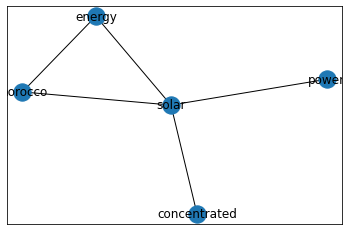

---------------------------------------
depth =  1
https://www.semanticscholar.org/paper/Towards-a-large-scale-integration-of-renewable-in-Boulakhbar-Lebrouhi/6632630fb73396a284f19c4ac1cc550810e1012b?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:221406222
topics :  ['Towards', 'a', 'large-scale', 'integration', 'of', 'renewable', 'energies', 'in', 'Morocco']


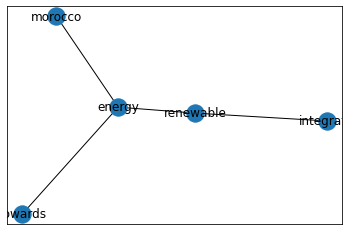

https://www.semanticscholar.org/paper/Energetic%2C-economic%2C-and-environmental-(3-E)-of-on-Aqachmar-Aqachmar/2469fc3915030d15372eb7c966e70562ca23cd69?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:216206584
topics :  ['Energetic,', 'economic,', 'and', 'environmental', '(3', 'E)', 'performances', 'of', 'high', 'concentrated', 'photovoltaic', 'large', 'scale', 'installations:', 'Focus', 'on', 'spatial', 'analysis', 'of', 'Morocco']


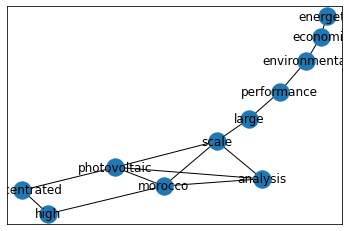

---------------------------------------
depth =  2
https://www.semanticscholar.org/paper/Technical-feasibility-of-a-sustainable-Concentrated-Bouhal-Agrouaz/3bbaeecbdf2ca856bdd72a090f23903c38497005?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:115731042
topics :  ['Technical', 'feasibility', 'of', 'a', 'sustainable', 'Concentrated', 'Solar', 'Power', 'in', 'Morocco', 'through', 'an', 'energy', 'analysis']


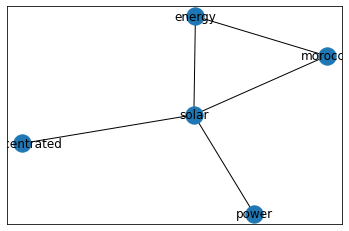

https://www.semanticscholar.org/paper/Transition-to-renewable-energy-and-sustainable-in-Vidadili-Suleymanov/5c1c28eeade77d42794e0631f0f0d431262685cc?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:113635010
topics :  ['Transition', 'to', 'renewable', 'energy', 'and', 'sustainable', 'energy', 'development', 'in', 'Azerbaijan']


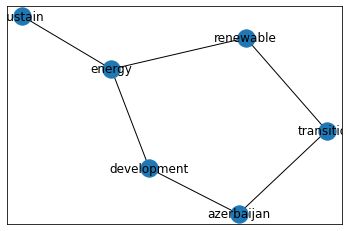

https://www.semanticscholar.org/paper/Development-of-high-concentration-photovoltaics-in-Mohammadi-Khanmohammadi/81255596eaded98feda626861aeb6c6445220aef?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:226329550
topics :  ['Development', 'of', 'high', 'concentration', 'photovoltaics', '(HCPV)', 'power', 'plants', 'in', 'the', 'US', 'Southwest:', 'Economic', 'assessment', 'and', 'sensitivity', 'analysis']


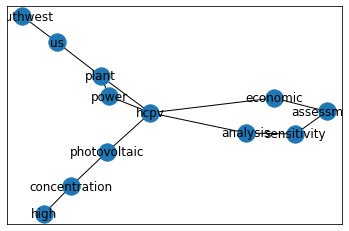

https://www.semanticscholar.org/paper/Photovoltaics-in-MENA-region%3A-Energetic%2C-and-Aqachmar-Lahrech/70f565436c048aa79645aa2c03084008886701e3?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:218650502
topics :  ['Photovoltaics', 'in', 'MENA', 'region:', 'Energetic,', 'environmental,', 'and', 'economic', 'potential']


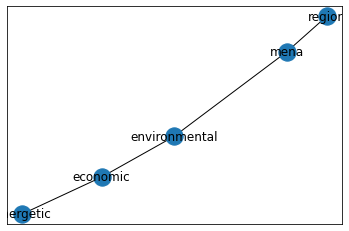

---------------------------------------
depth =  3
https://www.semanticscholar.org/paper/Towards-a-large-scale-integration-of-renewable-in-Boulakhbar-Lebrouhi/6632630fb73396a284f19c4ac1cc550810e1012b?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:221406222
topics :  ['Towards', 'a', 'large-scale', 'integration', 'of', 'renewable', 'energies', 'in', 'Morocco']


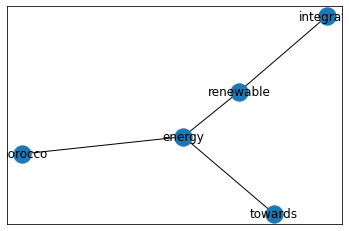

https://www.semanticscholar.org/paper/Parabolic-trough-solar-thermal-power-plant-Noor-I-Aqachmar-Allouhi/d3482de9e3017f3551ea23299ed6f495881b6946?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:150323697
topics :  ['Parabolic', 'trough', 'solar', 'thermal', 'power', 'plant', 'Noor', 'I', 'in', 'Morocco']


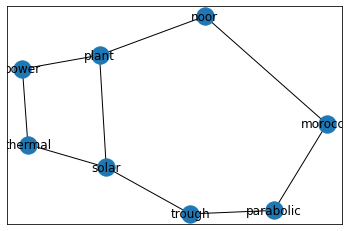

https://www.semanticscholar.org/paper/Renewable-Energy-and-Sustainable-Development-in-a-Jian-zhong-Assenova/1d8305159c41fb9304490ebe9c74ceafaec2a741?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:55925246
topics :  ['Renewable', 'Energy', 'and', 'Sustainable', 'Development', 'in', 'a', 'Resource-Abundant', 'Country:', 'Challenges', 'of', 'Wind', 'Power', 'Generation', 'in', 'Kazakhstan']


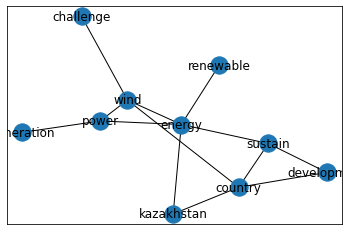

https://www.semanticscholar.org/paper/Of-renewable-energy%2C-energy-democracy%2C-and-A-to-the-Cantarero/772274fbc8744aa386f7cfe849323f1cb92c578b?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:224975751
topics :  ['Of', 'renewable', 'energy,', 'energy', 'democracy,', 'and', 'sustainable', 'development:', 'A', 'roadmap', 'to', 'accelerate', 'the', 'energy', 'transition', 'in', 'developing', 'countries']


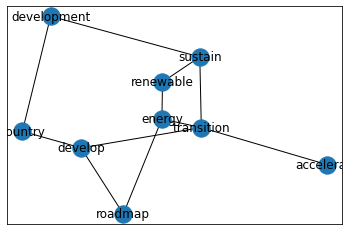

https://www.semanticscholar.org/paper/A-worldwide-assessment-of-economic-feasibility-of-Talavera-P%C3%A9rez-Higueras/8dba5bda8b7bf3d2f711b8374d45101f9c937cef?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:53467136
topics :  ['A', 'worldwide', 'assessment', 'of', 'economic', 'feasibility', 'of', 'HCPV', 'power', 'plants:', 'Profitability', 'and', 'competitiveness']


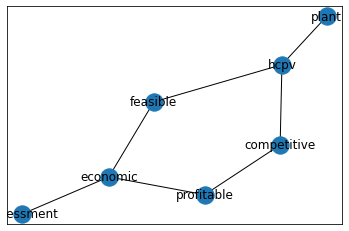

https://www.semanticscholar.org/paper/Energetic%2C-economic%2C-and-environmental-(3-E)-of-on-Aqachmar-Aqachmar/2469fc3915030d15372eb7c966e70562ca23cd69?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:216206584
topics :  ['Energetic,', 'economic,', 'and', 'environmental', '(3', 'E)', 'performances', 'of', 'high', 'concentrated', 'photovoltaic', 'large', 'scale', 'installations:', 'Focus', 'on', 'spatial', 'analysis', 'of', 'Morocco']


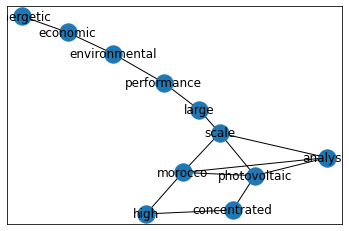

https://www.semanticscholar.org/paper/Energetic%2C-economic%2C-and-environmental-(3-E)-of-on-Aqachmar-Aqachmar/2469fc3915030d15372eb7c966e70562ca23cd69?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:216206584
topics :  ['Energetic,', 'economic,', 'and', 'environmental', '(3', 'E)', 'performances', 'of', 'high', 'concentrated', 'photovoltaic', 'large', 'scale', 'installations:', 'Focus', 'on', 'spatial', 'analysis', 'of', 'Morocco']


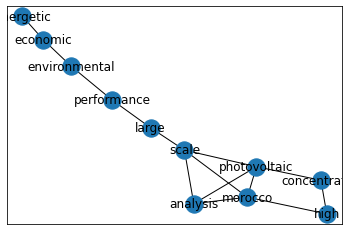

https://www.semanticscholar.org/paper/Strategic-considerations-for-deployment-of-solar-in-Griffiths/76e124a933537eef6ad7ff6ff4b869ae3fa149b0?citationRankingModelVersion=v0.2.0-0.01&citedPapersSort=relevance&citedPapersLimit=10&citedPapersOffset=0&sort=total-citations
https://api.semanticscholar.org/v1/paper/CorpusID:167792363
topics :  ['Strategic', 'considerations', 'for', 'deployment', 'of', 'solar', 'photovoltaics', 'in', 'the', 'Middle', 'East', 'and', 'North', 'Africa']


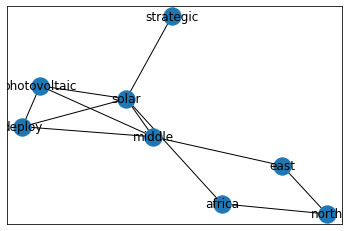

---------------------------------------


['written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written']

In [8]:
## test __main__
## root paper 

graphs_list = [ ]
n_iter = 3
print('depth = ' , 0 )
## root paper 
root_url = '/paper/Technical-feasibility-of-a-sustainable-Concentrated-Bouhal-Agrouaz/3bbaeecbdf2ca856bdd72a090f23903c38497005'
topics ,title, abstract,citations= get_data(root_url)
print('topics : ',topics)
print('citations : ', citations)
graph = topic_graph(abstract,topics,title)
graphs_list.append({'title':title,'graph':graph})
plot_graph(graph)
print('---------------------------------------')
for i in range(n_iter):
    print('depth = ' , i+1 )
    cit_all = [] 
    for cit_link in citations : 
        topics_ ,title_, abstract_,citations_= get_data(cit_link)
        print('topics : ',topics_+title_.split(' '))
        #print('citations : ', citations_)
        graph = topic_graph(abstract_,topics_,title_)
        plot_graph(graph)
        graphs_list.append({'title':title_,'graph':graph})
        cit_all = cit_all +citations_ 
    citations = cit_all 
        
    print('---------------------------------------')
        
## export graphs
[export_graph(graphs_dic) for graphs_dic in graphs_list ]

[write_title(graphs_dic['title']) for graphs_dic in graphs_list ]

In [22]:
write = [ write_title(graphs_dic['title']) for graphs_dic in graphs_list ] 

In [47]:
## to do 
## do section 2 : merge graphs : weighting summation (for one graph distance + occurence ) and when merging
## how can we enphasis occurence again ? (0.33 << 4)


In [4]:
[write_title(graphs_dic['title']) for graphs_dic in graphs_list ]


['written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written',
 'written']

In [27]:
export_graph('jsgraph.json')

[]
